# CS5228 Mini Project: Customer Segmentation & Churn Prediction

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 1. Data Preprocessing

### 1a. Load & Inspect

In [40]:
train = pd.read_csv('churn-bigml-80.csv')
test = pd.read_csv('churn-bigml-20.csv')
train.info()

<class 'pandas.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   str    
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   str    
 4   Voice mail plan         2666 non-null   str    
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   float64
 15

In [41]:
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [42]:
print(train['Churn'].value_counts())
print(train['International plan'].value_counts())
print(train['Voice mail plan'].value_counts())
print(train['Area code'].value_counts())
print(f"Unique states: {train['State'].nunique()}")

Churn
False    2278
True      388
Name: count, dtype: int64
International plan
No     2396
Yes     270
Name: count, dtype: int64
Voice mail plan
No     1933
Yes     733
Name: count, dtype: int64
Area code
415    1318
510     679
408     669
Name: count, dtype: int64
Unique states: 51


### 1b. Encode Categoricals

In [43]:
for df in [train, test]:
    df['Churn'] = df['Churn'].map({'True': 1, 'False': 0, True: 1, False: 0})
    df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
    df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


The following columns are dropped before modelling due by insight from earlier EDA run:
- **4 charge columns** (`Total day/eve/night/intl charge`): deterministic linear transforms of their corresponding minutes columns (r = 1.000).
- **`Area code`**: no predictive signal (churn rate is uniform across all 3 codes).
- **`State`**: high cardinality (51 categories, ~52 samples per state on average), encoding is impractical and each category has low `n`. Dropped to simplify model.
- **`Voice mail plan`**: near-perfectly correlated with `Number vmail messages` (r = 0.957). continuous count is retained as it carries more granular information.

In [44]:
drop_cols = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge',
             'Area code', 'State', 'Voice mail plan']
for df in [train, test]:
    df.drop(columns=drop_cols, inplace=True)
print(list(train.columns))

['Account length', 'International plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls', 'Customer service calls', 'Churn']


### 1c. Normalize Numerical Features

Fit scaler on train only, transform both train and test.

In [45]:
num_cols = train.select_dtypes(include='number').columns.drop('Churn').tolist()
print(num_cols)

['Account length', 'International plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls', 'Customer service calls']


In [46]:
scaler = StandardScaler()
train_scaled = train.copy()
test_scaled = test.copy()

train_scaled[num_cols] = scaler.fit_transform(train[num_cols])
test_scaled[num_cols] = scaler.transform(test[num_cols])

## 2. Exploratory Data Analysis (Training Set)

### 2a. Class Balance

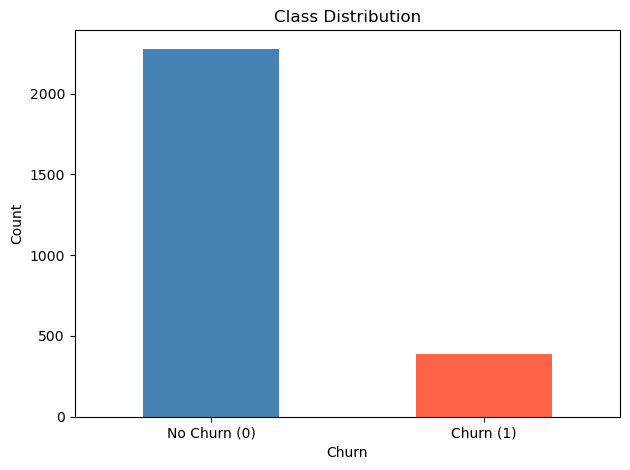

Churn
0    0.854464
1    0.145536
Name: count, dtype: float64


In [47]:
churn_counts = train['Churn'].value_counts()
churn_counts.plot(kind='bar', color=['steelblue', 'tomato'])
plt.xticks([0, 1], ['No Churn (0)', 'Churn (1)'], rotation=0)
plt.ylabel('Count')
plt.title('Class Distribution')
plt.tight_layout()
plt.show()
print(churn_counts / len(train))

**Interpretation:** The training set is imbalanced, only 14.6% of customers churned (makes sense, any higher churn and there will be no business). A naive model that predicts "no churn" for every customer would still achieve 85% accuracy, making accuracy a misleading standalone metric. In the supervised learning stage we prioritise **precision, recall, and F1-score** as primary metrics and consider adopting weighted loss/synthetic upsampling.

### 2b. Feature Distributions by Churn

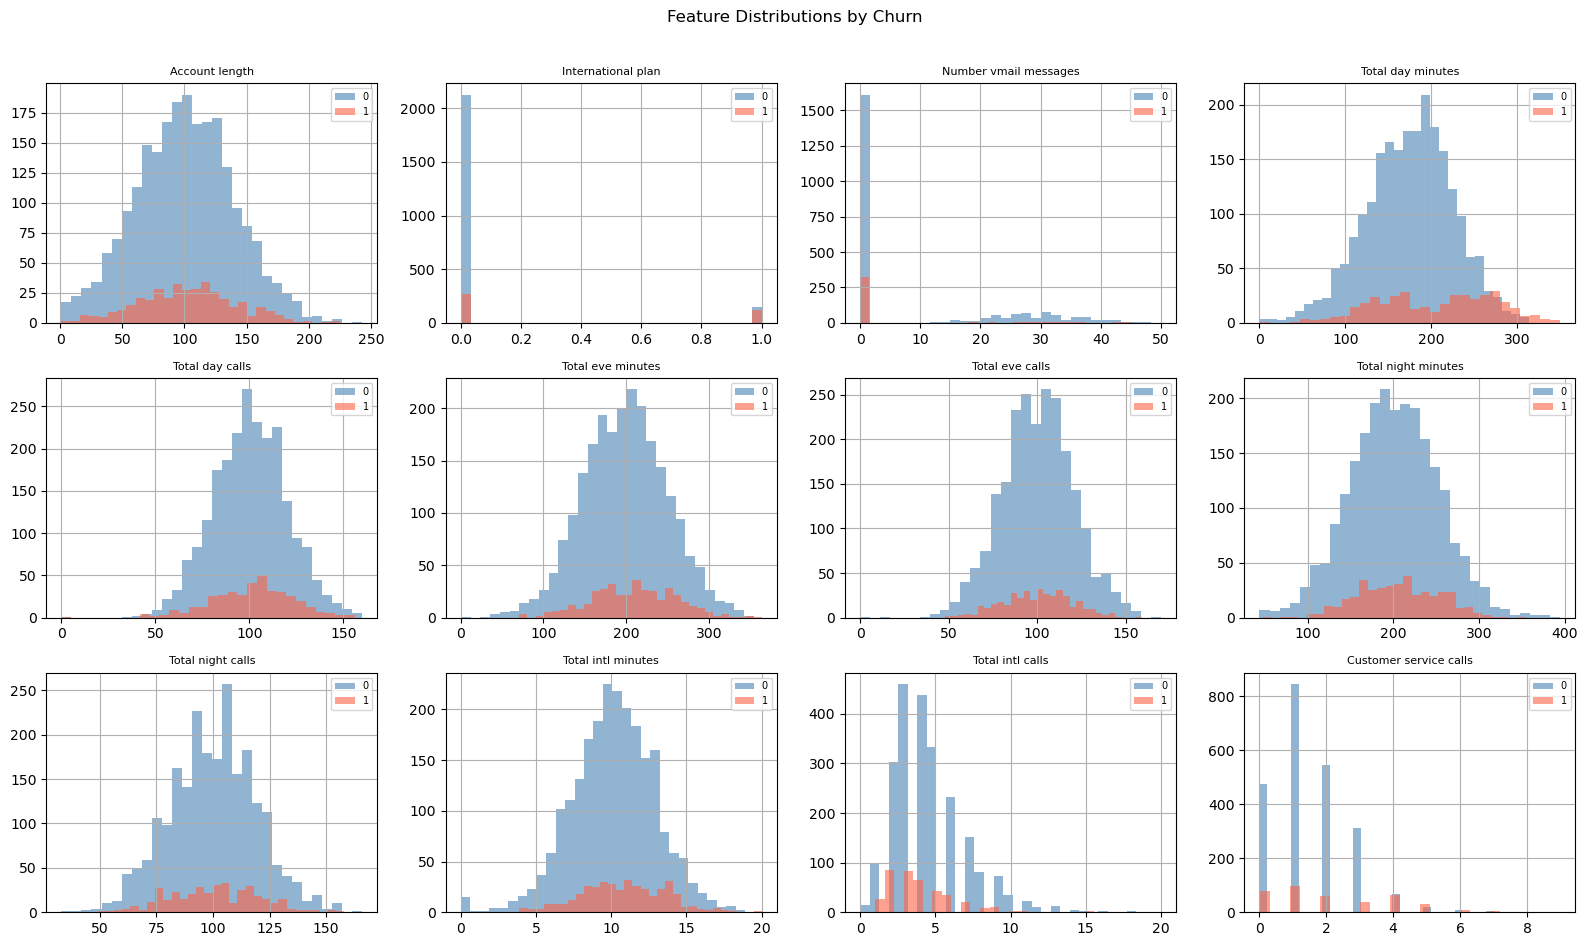

In [48]:
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    for label, color in [(0, 'steelblue'), (1, 'tomato')]:
        train[train['Churn'] == label][col].hist(ax=axes[i], alpha=0.6, color=color, bins=30, label=str(label))
    axes[i].set_title(col, fontsize=8)
    axes[i].legend(fontsize=7)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Feature Distributions by Churn', y=1.01)
plt.tight_layout()
plt.show()

**Interpretation:** Several features show meaningful distributional differences between churn (red) and non-churn (blue) groups:
- **Total day minutes:** The churn distribution is shifted noticeably right, heavy daytime users are more likely to leave, possibly due to higher bills.
- **Customer service calls:** Churn customers cluster at higher values (3+), strongly suggesting that repeated service contact reflects unresolved dissatisfaction.
- **Number vmail messages:** Non-churn customers tend to have more voicemail messages, consistent with the negative correlation seen in Section 2d.
- **Total intl minutes:** A slight rightward shift for churn customers hints that high international usage may drive dissatisfaction, possibly tied to international plan pricing.

### 2c. Collinearity Analysis

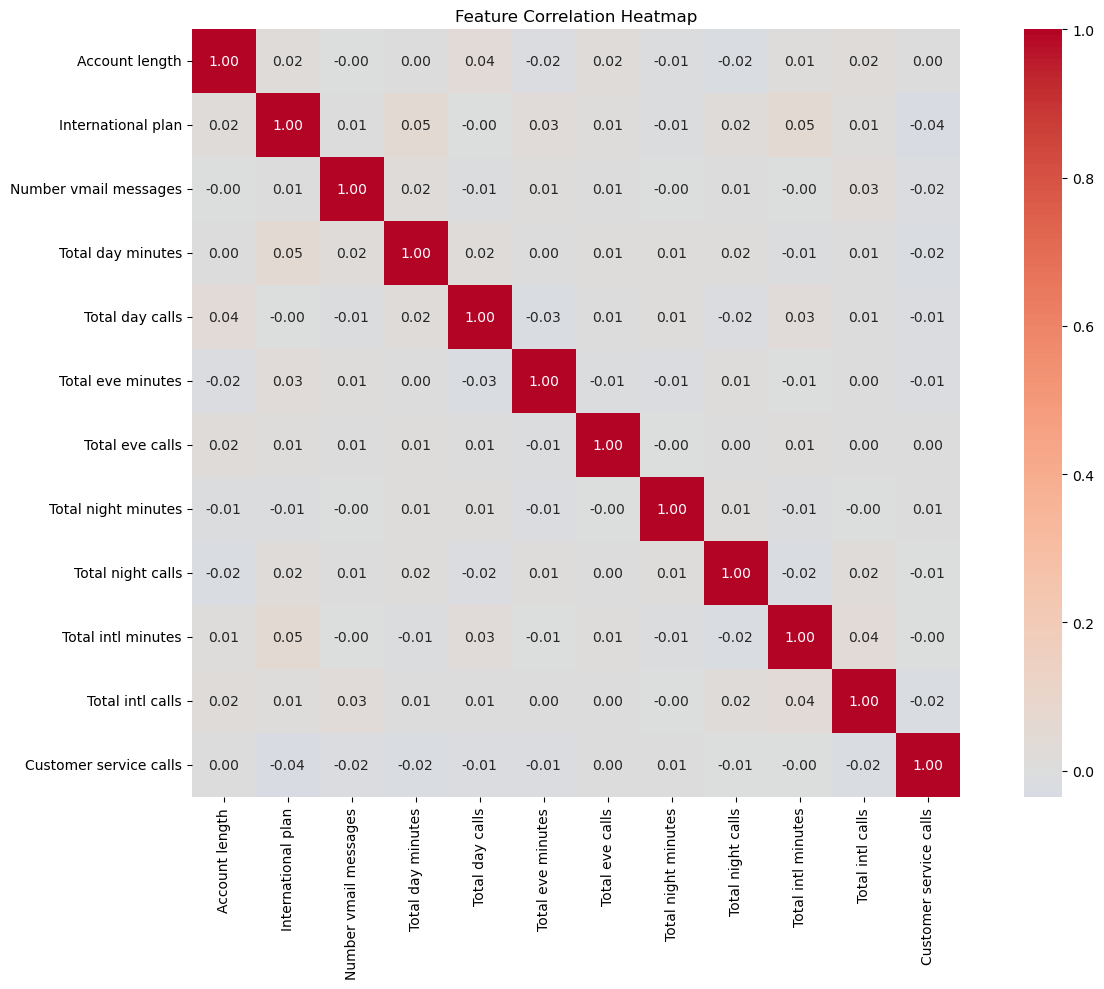

In [49]:
corr = train[num_cols].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

**Interpretation:** After removing all redundant features in preprocessing, the correlation matrix confirms that the retained features are largely independent and almost all pairwise correlations are |r| < 0.05. The notable exceptions are:

- **`Voice mail plan` and `Number vmail messages` (r = 0.957):** Previously identified here and resolved in preprocessing by dropping `Voice mail plan`.
- **`Total day/eve/night/intl minutes` and their charge counterparts (r = 1.000):** Previously identified here and resolved, charge columns were dropped.

Heatmap shows a clean, near-diagonal structure with no remaining multicollinearity concerns. This gives confidence that the retained features contribute independent signal to the models.

### 2d. Feature-vs-Churn Correlations

Point-biserial correlation for numerical features vs Churn.

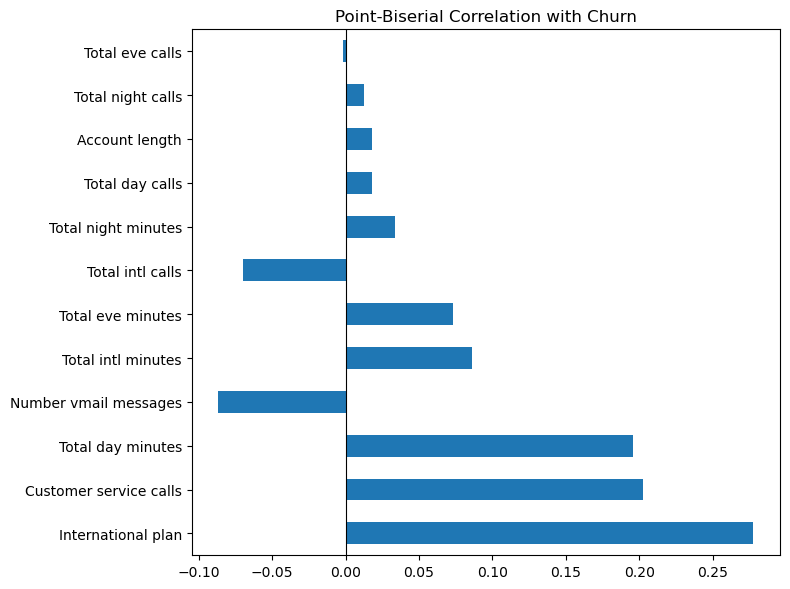

International plan        0.277489
Customer service calls    0.202590
Total day minutes         0.195688
Number vmail messages    -0.086474
Total intl minutes        0.086204
Total eve minutes         0.072906
Total intl calls         -0.069882
Total night minutes       0.033639
Total day calls           0.018290
Account length            0.017728
Total night calls         0.012262
Total eve calls          -0.001539
dtype: float64


In [50]:
from scipy.stats import pointbiserialr

correlations = {}
for col in num_cols:
    r, p = pointbiserialr(train['Churn'], train[col])
    correlations[col] = r

corr_series = pd.Series(correlations).sort_values(key=abs, ascending=False)
corr_series.plot(kind='barh', figsize=(8, 6))
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Point-Biserial Correlation with Churn')
plt.tight_layout()
plt.show()
print(corr_series)

**Interpretation:** Ranking features by absolute point-biserial correlation with churn identifies the strongest individual predictors:

- **Top 3 predictive features:** `International plan` (r = 0.277), `Customer service calls` (r = 0.203), and `Total day minutes` (r = 0.196). These provide the clearest signal for distinguishing churners from non-churners.
- **`Number vmail messages`** shows a moderate negative signal (r ≈ −0.086). Customers with active voicemail usage are less likely to churn.
- **Near-zero features:** Call count columns (`Total day/eve/night calls`), `Total intl calls`, and `Account length` carry essentially no linear signal for churn prediction.

### 2e. Categorical Feature Breakdown

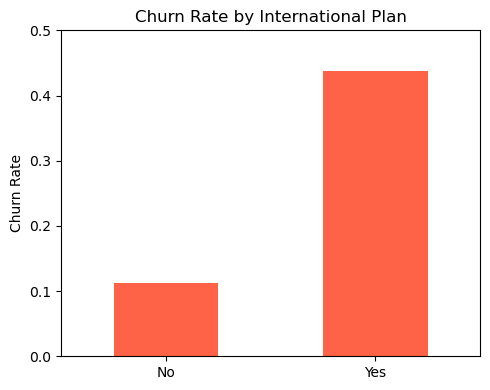

In [51]:
churn_rate = train.groupby('International plan')['Churn'].mean()
churn_rate.index = ['No', 'Yes']
churn_rate.plot(kind='bar', color='tomato', figsize=(5, 4))
plt.title('Churn Rate by International Plan')
plt.ylabel('Churn Rate')
plt.ylim(0, 0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Interpretation:**
- **International plan** has a dramatic effect: customers *with* the plan churn at ~42% vs ~11% without, nearly 4× higher. This is the single strongest categorical predictor of churn in the dataset, likely reflecting pricing dissatisfaction among heavy international callers.
- **Voice mail plan** (dropped due to redundancy with `Number vmail messages`): pre-drop analysis showed customers without a voicemail plan churned at ~17% vs ~8% with one — a meaningful protective effect captured by the retained `Number vmail messages` feature.
- **Area code** (dropped): showed essentially uniform churn rates across all three codes (~14%), confirming it carries no predictive signal.